<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/python/pandas_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Példák könyv adatok kezelésére Pythonból

Az adatokat a Kaggle.com oldalról töltjük le. A Kaggle szabadon felhasználható adathalmazokat kínál, elsp sorban meesterséges intelligencia alkalmazásokhoz.

A letöltést a Kaggle Python API-val (kagglehub) hajtjuk végre.

In [ ]:
import kagglehub

# Download latest version
data_path = kagglehub.dataset_download("elvinrustam/books-dataset")

print("Path to dataset files:", data_path)

Path to dataset files: /root/.cache/kagglehub/datasets/elvinrustam/books-dataset/versions/3


Nézzük meg mit töltöttünk le. Két CSV fájlt kaptunk. A következőkben a tisztított adatokkal dolgozunk (BooksDatasetClean.csv).

In [ ]:
import glob

files = glob.glob(data_path + "/*.csv")
print("Files: ", files)

Files:  ['/root/.cache/kagglehub/datasets/elvinrustam/books-dataset/versions/3/BooksDatasetClean.csv', '/root/.cache/kagglehub/datasets/elvinrustam/books-dataset/versions/3/BooksDataset.csv']


In [ ]:
file_path = files[1]
print("File path: ", file_path)

File path:  /root/.cache/kagglehub/datasets/elvinrustam/books-dataset/versions/3/BooksDataset.csv


A pandas modul segítségével töltsük be az adatokat egy pandas adatkeretbe (dataframe) és írjuk ki az első néhány sort.

In [ ]:
import pandas as pd

df = pd.read_csv(file_path)
df.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32


Tekintsük meg az összesített adatokat a betöltött adathalmazról. Nyolc oszlopot és több mint százezer sort tartalmaz.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103082 entries, 0 to 103081
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Title         103082 non-null  object
 1   Authors       103082 non-null  object
 2   Description   70213 non-null   object
 3   Category      76912 non-null   object
 4   Publisher     103074 non-null  object
 5   Publish Date  103082 non-null  object
 6   Price         103082 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB
None


További adatok a numerikus oszlopokról

In [ ]:
df.describe()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
count,103082,103082,70213,76912,103074,103082,103082
unique,97818,63580,68831,3106,13029,956,1387
top,The Velveteen Rabbit,By,For Ingest Only - Data needs to be cleaned up ...,"Fiction , General",Simon & Schuster,"Thursday, January 1, 2004",Price Starting at $5.29
freq,12,1043,30,2549,1521,868,41876


Vegük észre, hogy a kiadás dátuma egy hosszab karakterlánc, őrizzük meg belőle csak a kiadás évét mint egész számot.

In [ ]:
df["Publish Year"] = df["Publish Date"].str[-4:].astype(int)

Ellenőrizzük, hogy vannak-e kitöltetlen oszlopok. A leírás (Description) és kategória (Category) oszlopok kivételével a tisztított adatok között nincs ilyen.

In [ ]:
df.isnull().sum()

,0
Title,0
Authors,0
Description,32869
Category,26170
Publisher,8
Publish Date,0
Price,0


Ellenőrizzük a duplumokat is. Ilyen sincs.

In [ ]:
print(df.duplicated().sum())

8


Készítsünk egy grafikont a 10 leggyakrabban előforduló kategóriából. A kategória oszlop veszőkkel elválasztott felsorolást tartalmaz, egy könyv több kategőriába is besorolható. A következő kódrészlet a leggyakoribb kombinációt adja.

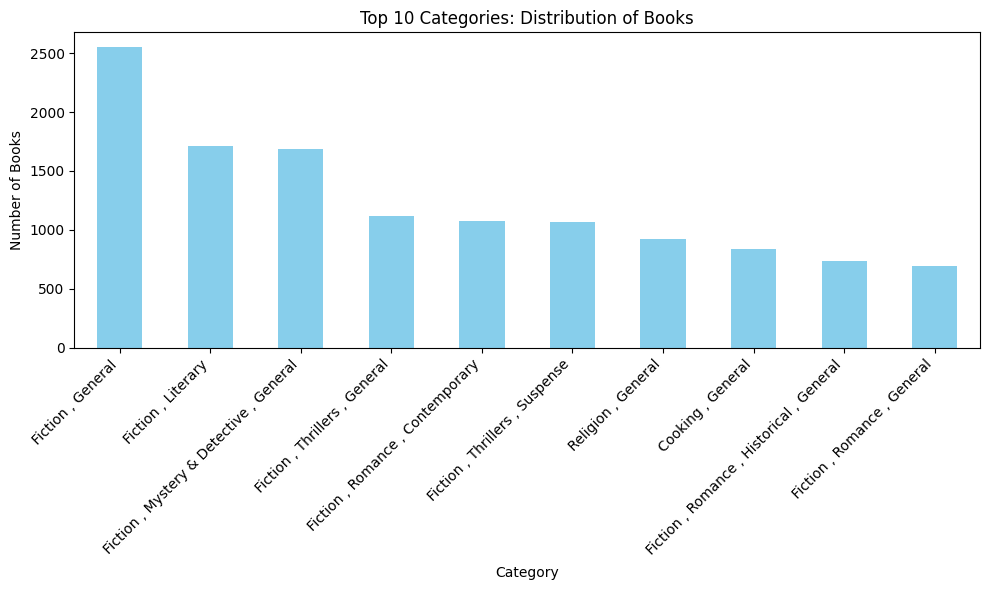

In [ ]:
from matplotlib import pyplot as plt
top_categories = df['Category'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories: Distribution of Books')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Jobb képet kaphatunk akategóriák előfordulásáról, ha nem a kombinációkat, hanem az egyes kategóriák csakoriságát vizsgáljuk.
A következő kódrészletben a kategóriák felbontását és statisztika készítését végezzük el. A **df["Category"]** adatkeret egy oszlopát adja, ezt egy adatsorozatnak nevezzük. A **dropna** függvény kihagyja a kitöltetlen elemeket. A **split** függvény a kategória felsorolást felbontja a vesszőknél és egy listába teszi. Az **explode** függvény a több kis listából olyan adatsorozatot hoz létre, melyben már minden elem egy kategóriát tartalmaz. Végül a **strip** függvény a szóközöket törli az elem elején és végén.

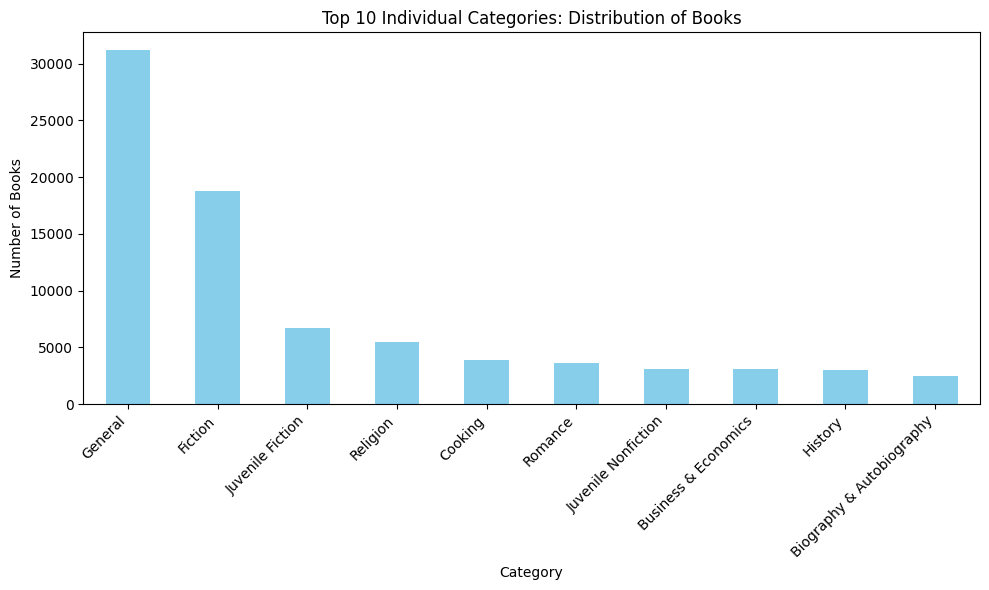

In [ ]:
individual_categories = df['Category'].dropna().str.split(',').explode().str.strip()
top_individual_categories = individual_categories.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_individual_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Individual Categories: Distribution of Books')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Nézzük meg, hogy hány különböző kategóriát használ az adathalmazunk és ezek közül melyek a legritkábban előfordulók.

In [ ]:
print(f"Number of categories used: {individual_categories.nunique()}")
print("\nLess frequent categories")
print(individual_categories.value_counts().tail(10))

Number of categories used: 2104

Less frequent categories
Category
Woodwinds                        1
Porcelain & China                1
Crime & Mystery                  1
Ornithology                      1
Violence                         1
Discrete Mathematics             1
Communication & Social Skills    1
Reform                           1
Hypnotism                        1
Pollution Control                1
Name: count, dtype: int64


Készítsünk statisztikát a szerzők szerint is. Vegyük észre, hogy a szerzők neve egy felsorolás, mely a "By" szóval kezdődik szinte minden esetben. Ezek számát kérdezzük le a következő utasítással

In [ ]:
len(df[df['Authors'].str.match(r'\s*By ')])

102039

Töröljük ki a mező elején lévő "By " részt. Ezt a keresés és csere függvénnyel hajtjuk végre.

In [ ]:
df['Authors'] = df['Authors'].str.replace(r'^\s*By\s*', '', regex=True)

Még ezután marad 1256 könyv, amihez nem tartozik szerző.

In [ ]:
print(f"Books without author: {len(df[df['Authors'].isin(['n/a', 'unknown', ''])])} / {len(df)}")

Books without author: 1257 / 103082


Készítsünk egy statisztikát szerzőnként (igazán szerző kombinációnként) egy átlagos könyv **árat** a legdrább tízre.
Vegyük észre, hogy a több szerző felbontása egyéni szerzőkre nem oldható meg programozottan, mert a vesszőt egyrész a vezeték és keresztnevet, másrészt a több szerrző nevét választja el.

In [ ]:
auth_price = df[['Authors', 'Price']]
auth_price['Price'] = auth_price['Price'].str.replace('Price Starting at $', '') .str.replace(',', '').astype(float)
print(auth_price.head())

#average_prices_by_author = auth_price.groupby('Authors')['Price'].mean().sort_values(ascending=False).head(10)
#print(average_prices_by_author)

                 Authors  Price
0          Colton, Larry   8.79
1        Grumbach, Doris   4.99
2  Piscatella, Joseph C.   4.99
3         Davis, Paul D.   4.99
4          Spangler, Amy   5.32


/tmp/ipython-input-1075848192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auth_price['Price'] = auth_price['Price'].str.replace('Price Starting at $', '') .str.replace(',', '').astype(float)


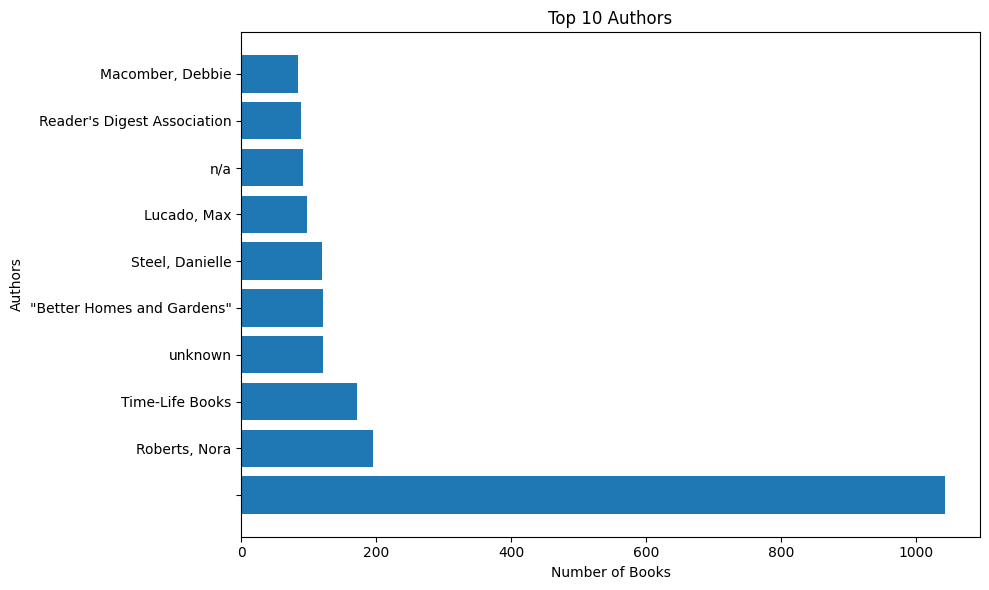

In [ ]:
top_authors = df['Authors'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_authors.index, top_authors.values)
plt.title('Top 10 Authors')
plt.xlabel('Number of Books')
plt.ylabel('Authors')
plt.tight_layout()
plt.show()

A fenti grafikonban a legutolsó, név nélküli elem a legnagyobb, ezek a szerző nélküli könyvek. Vegyük észre, hogy n/a és unknown is szerepel a szerzők között.

Készítsünk egy statisztikát az 1980 után megjelent könyvekre az évenkénti kiadott könyvek számával.

In [ ]:
filtered_years = df[(df['Publish Year'] > 1980) & (df['Publish Year'] <= 2026)]
yearly_counts_after_1980 = filtered_years['Publish Year'].value_counts().sort_index()
yearly_counts_after_1980.head(10)

,count
Publish Year,
1981,940
1982,1078
1983,1124
1984,1374
1985,1529
1986,1691
1987,1915
1988,2247
1989,2366


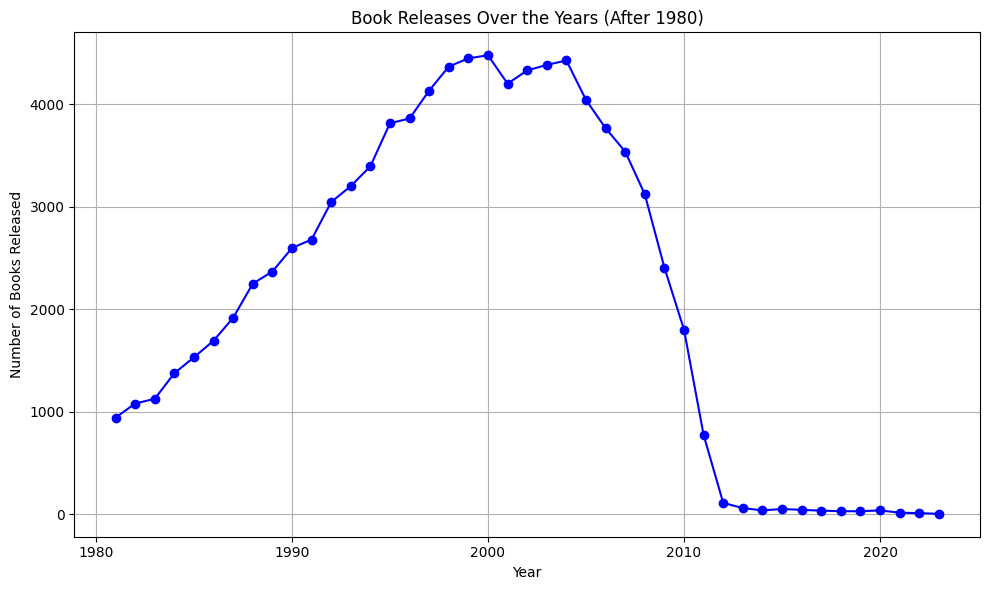

In [ ]:
plt.figure(figsize=(10, 6))
yearly_counts_after_1980.plot(kind='line', marker='o', color='blue')
plt.title('Book Releases Over the Years (After 1980)')
plt.xlabel('Year')
plt.ylabel('Number of Books Released')
plt.grid(True)
plt.tight_layout()
plt.show()

Készítsünk egy listát a kategóriák szerint, ilyet már készítettünk korábban, kicsit másképpen.

In [ ]:
categories = df['Category'].str.split(',', expand=True).stack().str.strip()
#print(categories)
category_counts = categories.value_counts()
top_categories = category_counts.head(12)
print(top_categories)

General                      31206
Fiction                      18769
Juvenile Fiction              6752
Religion                      5479
Cooking                       3930
Romance                       3657
Juvenile Nonfiction           3105
Business & Economics          3077
History                       3052
Biography & Autobiography     2468
Historical                    2459
Mystery & Detective           2425
Name: count, dtype: int64


Gyűjtsük ki az 1980 után kiadott főzéssel kapcsolatos könyveket!

In [ ]:
selection = (df["Publish Year"] > 1990) & (df["Category"].str.contains("Cooking"))
df[selection][["Title","Publish Year", "Category"]]

,Title,Publish Year,Category
42,"Eat More, Weigh Less: Dr. Dean Ornish's Life C...",2000,"Cooking , Health & Healing , Low Fat"
47,Healing Benefits of Garlic,1995,"Cooking , Specific Ingredients , Herbs, Spice..."
64,Cook Healthy: Cook Quick,1995,"Cooking , Health & Healing , Low Fat"
112,"Hey Mom! I'm Hungry!: Great-Tasting, Low-Fat, ...",1997,"Cooking , Health & Healing , Low Fat"
155,Big Kitchen Instruction Book,2000,"Cooking , Regional & Ethnic , American , General"
...,...,...,...
102883,The Fresh Pasta Cookbook: International Recipe...,1993,"Cooking , Regional & Ethnic , International"
102897,Outdoor Tables and Tales: Recipes and Food Mem...,1992,"Cooking , Methods , Outdoor"
102990,Lean Italian Cooking,1994,"Cooking , Regional & Ethnic , Italian"
103046,Vegetarian International Cuisine: An Essential...,1997,"Cooking , Vegetarian"
